# Importing Modules

In [30]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt # Make sure to import the matplotlib.pyplot module
import seaborn as sns
import plotly.express as px
import cufflinks as cf
from pandas.plotting import scatter_matrix
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')


# Importing DataSet


In [2]:
df = pd.read_csv('/content/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
df['State'].value_counts()

,count
State,
New York,17
California,17
Florida,16


In [6]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [ ]:
# Dependencies for Visualisation
from chart_studio import plotly as py
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
from pandas.plotting import scatter_matrix
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

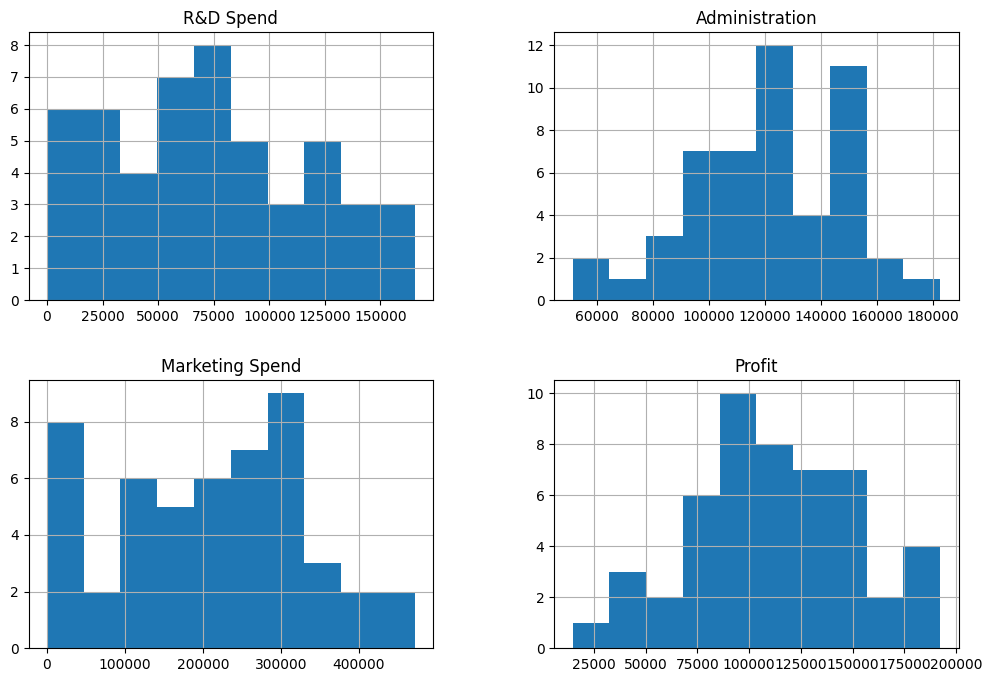

In [31]:
df.hist(figsize=(12,8),bins=10)
plt.show()

# Creating a TestSet

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
Features = df.drop('Profit',axis=1)
Labels = df['Profit']
Features.shape, Labels.shape

((50, 4), (50,))

In [10]:
X_train,X_test,y_train,y_test = train_test_split(Features,Labels,test_size=.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((40, 4), (10, 4), (40,), (10,))

# Visualise and Discover the Data to Gain Insights

In [11]:
df_numeric = df.drop('State',axis=1).corr()
df_numeric

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [32]:
# Heatmap to visualize Correlation b/w variables
px.imshow(df_numeric)

# Cleaning the data

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(df['State'])

LabelEncoder()

In [15]:
X_train['State'] = le.transform(X_train['State'])
X_train['State']

,State
21,2
16,0
27,2
9,0
7,1
48,2
12,1
29,2
18,1
32,0


In [16]:
X_test['State'] = le.transform(X_test['State'])
X_test['State']

,State
2,1
30,1
38,2
37,0
26,1
43,2
19,2
1,0
44,0
20,0


In [17]:
le.classes_

array(['California', 'Florida', 'New York'], dtype=object)

# Linear Regression

\begin{equation}
h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_d x_d
\end{equation}

\begin{equation}
h_\theta(x) = \theta^T x
\end{equation}

\begin{equation}
x_0 = 1
\end{equation}

\begin{equation}
J(\theta) = \frac{1}{2} \sum_{i=1}^{n} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
\end{equation}


In [18]:
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [19]:
X = X_train.to_numpy()
X.shape

(40, 4)

In [20]:
Y = y_train.to_numpy()
Y = Y.reshape(-1,1)
Y.shape

(40, 1)

In [21]:
X = np.append(np.ones((40,1)),X,axis=1)

# The Normal Equations

\begin{align*}
\nabla_\theta J(\theta) &= \nabla_\theta \left( \frac{1}{2} (X\theta - \tilde{y})^\top (X\theta - \tilde{y}) \right) \\
&= \frac{1}{2} \nabla_\theta (X\theta - \tilde{y})^\top (X\theta - \tilde{y}) \\
&= \frac{1}{2} \nabla_\theta (\theta^\top X^\top X \theta - 2\theta^\top X^\top \tilde{y} + \tilde{y}^\top \tilde{y}) \\
&= \frac{1}{2} (2X^\top X \theta - 2X^\top \tilde{y}) \\
&= X^\top X \theta - X^\top \tilde{y} \\
\end{align*}

**Solving For Theta**

\begin{align*}
X^\top X \theta &= X^\top \tilde{y} \\
\theta &= (X^\top X)^{-1} X^\top \tilde{y}
\end{align*}


In [22]:
# Function to calculate the values of the parameters and return them
def normal_equation(X,Y):
    return np.linalg.inv(X.T@X)@X.T@Y

In [23]:
# [𝜃_0 ,𝜃_1, 𝜃_3, 𝜃_4]
theta = normal_equation(X,Y)
theta

array([[ 4.62891292e+04],
       [ 7.98214279e-01],
       [-8.32666837e-04],
       [ 3.29546331e-02],
       [-9.65580101e+02]])

In [24]:
#Function which takes in data and theta(parameter values) and give the predicted values as output
def predict(X, theta):
    X = np.append(np.ones((X.shape[0],1)), X,axis=1)
    return (X @ theta).reshape(10,)

In [25]:
y_pred = predict(X_test,theta)

In [26]:
from sklearn.metrics import r2_score

In [27]:
print(r2_score(y_test,y_pred) * 100)

96.85457972610925
